In [254]:
import numpy as np
from numpy import inf
from pylab import fill
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.colors import LogNorm
from matplotlib.colors import Colormap
import matplotlib.patches as mpatches
import scipy
from scipy import io
import glob
import SAplotter
from SAplotter import *
from filedata import *
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve


In [11]:
data = collector('diffuse_survey_source_arrays/1130781304_source_array.sav')

In [ ]:
sep = separator(data)

In [9]:
data['data']

[]

In [ ]:
#plotall doesnt work like it should! 
plotall(data,40,45,55,-40,-30)

In [ ]:
separated = separator(data)

In [ ]:
len(data['data'][0]['source_array'][0]['extend'])

In [145]:
data1 = openFile('diffuse_survey_source_arrays/1130781304_source_array.sav')

In [ ]:
ext = []

for i in range(len(data1['source_array'])):
    if data1['source_array'][i]['extend'] is not None:
        ext.append(len(data1['source_array'][i]['extend']))
        print 'i = ',i
        print 'there are',len(data1['source_array'][i]['extend']),'components in this object'
        print 
        print '\n'

print 'there are ',len(ext),'extended objects in this file'

In [ ]:
def elemplot(data,elem):
    
    for i in range(len(data)):
        if data[i]['extend']['ra'] > 180:
            data[i]['extend']['ra'] -= 360
    
    ra = data[elem]['extend']['ra']            # if you want to plot something directly from the
    dec = data[elem]['extend']['dec']          # variable data, use "data = data['source_array']"
    
    plt.hist2d(ra, dec, bins=40)
    plt.colorbar()
    plt.xlabel('ra')
    plt.ylabel('dec')
    plt.title('2-D Histogram of a Single Extended Source')
    plt.show()

In [ ]:
elemplot(data1['source_array'],4544)

In [90]:
#modifications of plotEO

def plotEO(data,sumI,n_bins):
    from matplotlib.colors import LogNorm
    from numpy import inf
    
    separated = separator(data)
    
    indexed_EO_sources_RA = [[[separated['extsources'][i][j]['EXTEND']['RA'][k] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['RA']))] \
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]

    indexed_EO_sources_DEC = [[[separated['extsources'][i][j]['EXTEND']['DEC'][k] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['DEC']))] \
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]

    indexed_EO_sources_I = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['I'][0] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX'])) ]
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]
    
    
    for i in range(len(separated['extsources'])):
        for j in range(len(separated['extsources'][i])):
            if (sum(indexed_EO_sources_I[i][j]) > sumI):
                ra_zoom = [min(indexed_EO_sources_RA[i][j]),max(indexed_EO_sources_RA[i][j])]
                dec_zoom = [min(indexed_EO_sources_DEC[i][j]),max(indexed_EO_sources_DEC[i][j])]
                
                ra_total = np.array(indexed_EO_sources_RA[i][j])
                dec_total = np.array(indexed_EO_sources_DEC[i][j])
                flux_total = np.array(indexed_EO_sources_I[i][j])
                
                (pixels, ra_pixel_centers, dec_pixel_centers) = \
                pixelate(ra_zoom,dec_zoom,n_bins,ra_total,dec_total,flux_total)
                
                # print bin_size
                
                pixels[pixels == 0] = 1e-2
                logpixels = np.log10(pixels)                
                #cmap = matplotlib.cm.get_cmap('afmhot')
                cmap = matplotlib.cm.get_cmap('autumn')
                
                plt.figure(figsize=(9,8))
                plt.imshow(np.transpose(logpixels), \
                    origin = "lower", \
                    interpolation = "gaussian",\
                    #norm = LogNorm(vmin=.01,vmax=max(flux_total)),\
                    cmap = cmap,\
                    extent = [ra_pixel_centers[0], ra_pixel_centers[len(ra_pixel_centers)-1], \
                    dec_pixel_centers[0], dec_pixel_centers[len(dec_pixel_centers)-1]

                plt.title("ObsID: {} at Frequency {}".format(separated['extsources'][i][j]['ID'], separated['extsources'][i][j]['FREQ']), fontsize = 20)
                plt.xlabel('RA', fontsize = 14)
                plt.ylabel('DEC', fontsize = 14)
                plt.tick_params(size = 8, labelsize = 12)
                plt.minorticks_on()
                plt.tick_params('both', length=12, width=1.8, which='major')
                plt.tick_params('both',length=5, width=1.4, which='minor')
                plt.annotate("ObsID: {}\nComponents: {}\nTotal Flux: {}\nMean RA: {}\nMean Dec: {}\n".format \
                    (separated['extsources'][i][j]['ID'], len(indexed_EO_sources_I[i][j]), np.sum(indexed_EO_sources_I[i][j]), \
                    np.mean(indexed_EO_sources_RA[i][j]), np.mean(indexed_EO_sources_DEC[i][j])),\
                    xy=(1.5, .5), xytext=(0, 0),\
                    xycoords=('axes fraction', 'figure fraction'),\
                    textcoords='offset points',\
                    size=14, ha='center', va='bottom')
                
                plt.colorbar(label='Janskies')
               # plt.savefig('pixelatedEO'+'{}'.format(separated['extsources'][i][j]['ID'])+'.png')
    return plt.show()
    #print bin_size
                              

SyntaxError: invalid syntax (<ipython-input-90-d0268e4868a9>, line 44)

In [102]:
def plootEO(data,sumI,n_bins):
    from matplotlib.colors import LogNorm
    from numpy import inf
    
    separated = separator(data)
    
    indexed_EO_sources_RA = [[[separated['extsources'][i][j]['EXTEND']['RA'][k] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['RA']))] \
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]

    indexed_EO_sources_DEC = [[[separated['extsources'][i][j]['EXTEND']['DEC'][k] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['DEC']))] \
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]

    indexed_EO_sources_I = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['I'][0] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX'])) ]
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]
   
    indexed_EO_sources_XX = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['XX'][0] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX'])) ]
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]
    
    indexed_EO_sources_YY = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['YY'][0] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX'])) ]
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]
    
    #print indexed_EO_sources_RA
    
    for i in range(len(separated['extsources'])):
        for j in range(len(separated['extsources'][i])):
            if(sum(indexed_EO_sources_I[i][j]) > sumI):
                ra_zoom = [min(indexed_EO_sources_RA[i][j]),max(indexed_EO_sources_RA[i][j])]
                dec_zoom = [min(indexed_EO_sources_DEC[i][j]),max(indexed_EO_sources_DEC[i][j])]
                
                ra_total = np.array(indexed_EO_sources_RA[i][j])
                dec_total = np.array(indexed_EO_sources_DEC[i][j])
                flux_total = np.array(indexed_EO_sources_I[i][j])
                
                
                '''
                #
                if (ra_zoom[1]-ra_zoom[0]) > (dec_zoom[1]-dec_zoom[0]):
                    zoom = ra_zoom
                else:
                    zoom = dec_zoom
                
                #Find the size of the bins using the largest dimension and the num of bins
                n_bins = (zoom[1]-zoom[0])/binsize
                print n_bins
                
                #
                '''
                (pixels, ra_pixel_centers, dec_pixel_centers) = \
                pixelate(ra_zoom,dec_zoom,n_bins,ra_total,dec_total,flux_total)
                
                pixels[pixels == 0] = 1e-2
                logpixels = np.log10(pixels)                
                #cmap = matplotlib.cm.get_cmap('afmhot')
                cmap = matplotlib.cm.get_cmap('hot')
                
                #trying out some gaussian convolution
                kernel = Gaussian2DKernel(stddev=1)
                #scipy_conv = scipy_convolve(pixels, kernel, mode='same', method='direct')
                #astropy_conv = convolve(pixels, kernel)
                smoothed_data = convolve(pixels, kernel)
                #dont mind me
                
                plt.figure(figsize=(9,8))
                plt.imshow(np.transpose(smoothed_data),\
                    origin = "lower", \
                    interpolation = "none",\
                    #vmin=0.001,\
                    #vmax=2,\
                    norm = LogNorm(vmin=.01,vmax=max(flux_total)),\
                    cmap = cmap,\
                    extent = [ra_pixel_centers[0], ra_pixel_centers[len(ra_pixel_centers)-1], \
                    dec_pixel_centers[0], dec_pixel_centers[len(dec_pixel_centers)-1]])

                plt.title('ObsID: {} at Frequency {}'.format(separated['extsources'][i][j]['ID'], separated['extsources'][i][j]['FREQ']), fontsize = 20)
                plt.xlabel('RA', fontsize = 14)
                plt.ylabel('DEC', fontsize = 14)
                plt.tick_params(size = 8, labelsize = 12)
                plt.minorticks_on()
                plt.tick_params('both', length=12, width=1.8, which='major')
                plt.tick_params('both',length=5, width=1.4, which='minor')
                
                #lets gettttt...
                
                #fig = plt.gcf()
                #ax = fig.gca()
                #circ = plt.Circle((50.7,-36.9),radius=0.0833333, color='g',fill=False)
                #ax.add_artist(circ)
                '''
                legend = ax.legend(loc='upper right', shadow=True)
                frame = legend.get_frame()
                frame.set_facecolor('0.90')
                
                red_patch = mpatches.Patch(color='red', label='The red data')
                plt.legend(loc='best',handles=[red_patch])
                
                #a legend!!
                '''
                plt.annotate("ID: {}\nComponents: {}\nTotal Flux: {}\nMean RA: {}\nMean Dec: {}\nelem: {}".format \
                    (separated['extsources'][i][j]['ID'], len(indexed_EO_sources_I[i][j]), np.sum(indexed_EO_sources_I[i][j]), \
                    np.mean(indexed_EO_sources_RA[i][j]), np.mean(indexed_EO_sources_DEC[i][j])),j,\
                    xy=(1.5, .5), xytext=(0, 0),\
                    xycoords=('axes fraction', 'figure fraction'),\
                    textcoords='offset points',\
                    size=14, ha='center', va='bottom')
                
                plt.colorbar(label='Janskies')
                # plt.savefig('pixelatedEO'+'{}'.format(separated['extsources'][i][j]['ID'])+'.png')
    return plt.show()

    # line 48 plt.imshow(np.transpose(pixels),\  #pixels used to be logpixels
    # line 50 interpolation = "nearest",\  #interpolate used to be 'gaussian'
    #     changed this to 'none'
    # vmax was vmax=max(flux_total))

In [103]:
plootEO(data,200,150)

IndexError: tuple index out of range

0.0123084259033
0.0149716949463


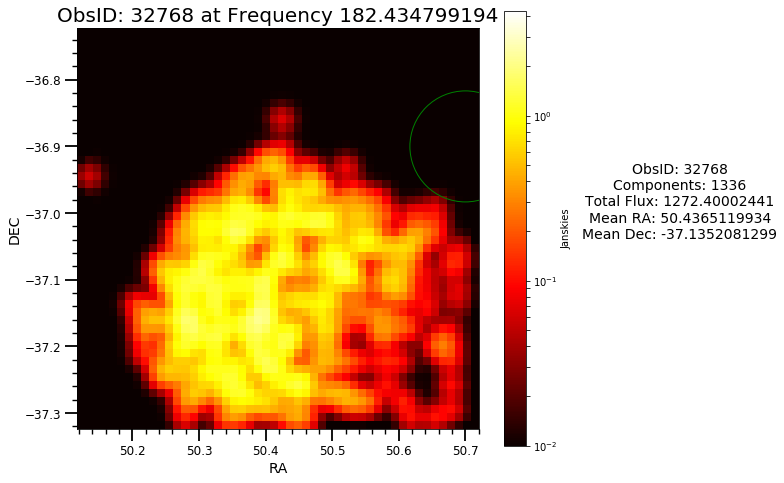

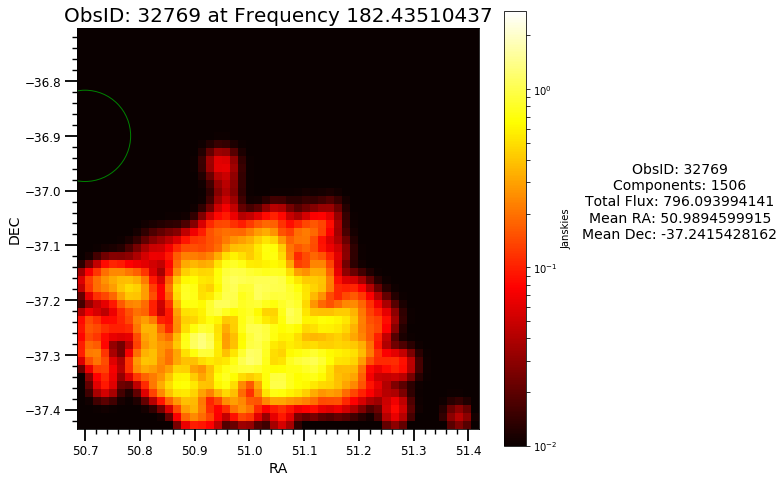

In [42]:
plootEO(data,200,50)

In [ ]:
plootEO(data,30,150)

In [ ]:
plootEO(data,30,80)

In [79]:
data2 = collector('diffuse_survey_source_arrays/1130789944_source_array.sav')

In [ ]:
data3_3 = collector('diffuse_survey_source_arrays/1130791024_source_array.sav')

In [ ]:
plootEO(data3_3,15,150)

In [ ]:
plootEO(data,30,150)

In [ ]:
plootEO(data3_3,15,78)

In [ ]:
data1 = openFile('diffuse_survey_source_arrays/1130781304_source_array.sav')

In [ ]:
data2_2 = openFile('diffuse_survey_source_arrays/1130789944_source_array.sav')

In [ ]:
data3 = openFile('diffuse_survey_source_arrays/1130791024_source_array.sav')

In [ ]:
def allIntensities(data):

    data_len = range(len(data['source_array']))        #This function will not list the intensities
                                                       #of an extended object's children, only the 
    for o in data_len:                                 #one intensity value of the parent.
       #if data['source_array'][o]['flux']['i'] < 0.3:
       print data['source_array'][o]['flux']['i']    

In [ ]:
allIntensities(data1)

In [ ]:
allIntensities(data2_2)

In [ ]:
len(data2_2['source_array'])

In [ ]:
len(data3['source_array']) ** 0.5

In [ ]:
allIntensities(data3)

In [ ]:
def plotterEO(data,sumI,n_bins):
    from matplotlib.colors import LogNorm
    from numpy import inf
    
    separated = separator(data)
    
    indexed_EO_sources_RA = [[[separated['extsources'][i][j]['EXTEND']['RA'][k] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['RA']))] \
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]

    indexed_EO_sources_DEC = [[[separated['extsources'][i][j]['EXTEND']['DEC'][k] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['DEC']))] \
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]

    indexed_EO_sources_I = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['I'][0] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX'])) ]
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]
    
    
    
    for i in range(len(separated['extsources'])):
        for j in range(len(separated['extsources'][i])):
            if(sum(indexed_EO_sources_I[i][j]) > sumI):
                ra_zoom = [min(indexed_EO_sources_RA[i][j]),max(indexed_EO_sources_RA[i][j])]
                dec_zoom = [min(indexed_EO_sources_DEC[i][j]),max(indexed_EO_sources_DEC[i][j])]
                
                ra_total = np.array(indexed_EO_sources_RA[i][j])
                dec_total = np.array(indexed_EO_sources_DEC[i][j])
                flux_total = np.array(indexed_EO_sources_I[i][j])
                
                (pixels, ra_pixel_centers, dec_pixel_centers) = \
                pixelate(ra_zoom,dec_zoom,n_bins,ra_total,dec_total,flux_total)
                
                pixels[pixels == 0] = 1e-2
                logpixels = np.log10(pixels)                
                cmap = matplotlib.cm.get_cmap('afmhot')
                
                plt.figure(figsize=(9,8))
                plt.imshow(np.transpose(logpixels), \
                    origin = "lower", \
                    interpolation = "gaussian",\
                    norm = LogNorm(vmin=.01,vmax=max(flux_total)),\
                    
                    cmap = cmap,\
                    extent = [ra_pixel_centers[0], ra_pixel_centers[len(ra_pixel_centers)-1], \
                    dec_pixel_centers[0], dec_pixel_centers[len(dec_pixel_centers)-1]])

                plt.title('ObsID: {} at Frequency {}'.format(separated['extsources'][i][j]['ID'], separated['extsources'][i][j]['FREQ']), fontsize = 20)
                plt.xlabel('RA', fontsize = 14)
                plt.ylabel('DEC', fontsize = 14)
                plt.tick_params(size = 8, labelsize = 12)
                plt.minorticks_on()
                plt.tick_params('both', length=12, width=1.8, which='major')
                plt.tick_params('both',length=5, width=1.4, which='minor')
                plt.annotate("ObsID: {}\nComponents: {}\nTotal Flux: {}\nMean RA: {}\nMean Dec: {}".format \
                    (separated['extsources'][i][j]['ID'], len(indexed_EO_sources_I[i][j]), np.sum(indexed_EO_sources_I[i][j]), \
                    np.mean(indexed_EO_sources_RA[i][j]), np.mean(indexed_EO_sources_DEC[i][j])),\
                    xy=(1.5, .5), xytext=(0, 0),\
                    xycoords=('axes fraction', 'figure fraction'),\
                    textcoords='offset points',\
                    size=14, ha='center', va='bottom')
                
                plt.colorbar(label='Janskies')
               # plt.savefig('pixelatedEO'+'{}'.format(separated['extsources'][i][j]['ID'])+'.png')
    return plt.show()

In [ ]:
def bintime(data,sumI):
    from matplotlib.colors import LogNorm
    from numpy import inf
    
    length = 0
    
    for i in range(len(data['data'][0]['source_array'])):
        if data['data'][0]['source_array'][i]['extend'] is not None:
            for o in range(len(data['data'][0]['source_array'][i]['extend'])):
                if data['data'][0]['source_array'][i]['extend'][o] is not None:
                    length += 1
        else:
            length += 1   
    
    print length
    
    separated = separator(data)
    
    indexed_EO_sources_RA = [[[separated['extsources'][i][j]['EXTEND']['RA'][k] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['RA']))] \
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]

    indexed_EO_sources_DEC = [[[separated['extsources'][i][j]['EXTEND']['DEC'][k] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['DEC']))] \
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]

    indexed_EO_sources_I = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['I'][0] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX'])) ]
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]
    
    n_bins = int(math.ceil(len(indexed_EO_sources_I[0]) ** 0.5))
    #n_bins = int(math.ceil(length ** 0.5))    # <---  bins is sqr root of # of components in file
    print 'bins = ',n_bins
    print '# of bins is sqr root of # of sources in file'
    
    #n_bins = int(math.ceil(len(indexed_EO_sources_I[0]) ** 0.5))    #<--- bins is sqr root of
    #print n_bins                                                         # of sources in file

    #n_bins = int(math.ceil(length ** 0.5))                     # <--- bins is amount of comps in an obj
    #print n_bins

    
    for i in range(len(separated['extsources'])):
        for j in range(len(separated['extsources'][i])):
            if(sum(indexed_EO_sources_I[i][j]) > sumI):
                ra_zoom = [min(indexed_EO_sources_RA[i][j]),max(indexed_EO_sources_RA[i][j])]
                dec_zoom = [min(indexed_EO_sources_DEC[i][j]),max(indexed_EO_sources_DEC[i][j])]
                
                ra_total = np.array(indexed_EO_sources_RA[i][j])
                dec_total = np.array(indexed_EO_sources_DEC[i][j])
                flux_total = np.array(indexed_EO_sources_I[i][j])
                
                (pixels, ra_pixel_centers, dec_pixel_centers) = \
                pixelate(ra_zoom,dec_zoom,n_bins,ra_total,dec_total,flux_total)
                
                pixels[pixels == 0] = 1e-2
                logpixels = np.log10(pixels)                
                cmap = matplotlib.cm.get_cmap('afmhot')
                
                plt.figure(figsize=(9,8))
                plt.imshow(np.transpose(logpixels), \
                    origin = "lower", \
                    interpolation = "gaussian",\
                    #norm = LogNorm(vmin=.01,vmax=max(flux_total)),\
                    
                    cmap = cmap,\
                    extent = [ra_pixel_centers[0], ra_pixel_centers[len(ra_pixel_centers)-1], \
                    dec_pixel_centers[0], dec_pixel_centers[len(dec_pixel_centers)-1]])

                plt.title('ObsID: {} at Frequency {}'.format(separated['extsources'][i][j]['ID'], separated['extsources'][i][j]['FREQ']), fontsize = 20)
                plt.xlabel('RA', fontsize = 14)
                plt.ylabel('DEC', fontsize = 14)
                plt.tick_params(size = 8, labelsize = 12)
                plt.minorticks_on()
                plt.tick_params('both', length=12, width=1.8, which='major')
                plt.tick_params('both',length=5, width=1.4, which='minor')
                plt.annotate("ObsID: {}\nComponents: {}\nTotal Flux: {}\nMean RA: {}\nMean Dec: {}".format \
                    (separated['extsources'][i][j]['ID'], len(indexed_EO_sources_I[i][j]), np.sum(indexed_EO_sources_I[i][j]), \
                    np.mean(indexed_EO_sources_RA[i][j]), np.mean(indexed_EO_sources_DEC[i][j])),\
                    xy=(1.5, .5), xytext=(0, 0),\
                    xycoords=('axes fraction', 'figure fraction'),\
                    textcoords='offset points',\
                    size=14, ha='center', va='bottom')
                
                plt.colorbar(label='Janskies')
               # plt.savefig('pixelatedEO'+'{}'.format(separated['extsources'][i][j]['ID'])+'.png')
    return plt.show()     

In [ ]:
bintime(data2,10)

In [ ]:
bintime(data2,30)

In [ ]:
plootEO(data2,10,100)

In [ ]:
plootEO(data2,10,50)

In [ ]:
plootEO(data2,10,120)

In [ ]:
data2['data'][0]['source_array'][0]['extend'][0]

In [77]:
data01 = openFile('diffuse_survey_source_arrays/1130781304_source_array.sav')

In [108]:
def beamer(data):

    data_len = range(len(data['source_array']))
    for i in data_len:
        beam = (data['source_array'][i]['flux']['XX'] + data['source_array'][i]['flux']['YY']) / data['source_array'][i]['flux']['I'] 
        print 'the beam value of elem {} is {}'.format(i,beam)
        print 'the intensity of this element is {}'.format(data['source_array'][i]['flux']['I'])

In [147]:
beamer(data1)

the beam value of elem 0 is [ 0.52701116]
the intensity of this element is [ 1272.39978027]
the beam value of elem 1 is [ 0.53768373]
the intensity of this element is [ 796.09338379]
the beam value of elem 2 is [ 0.15846437]
the intensity of this element is [ 80.8598938]
the beam value of elem 3 is [ 0.39332217]
the intensity of this element is [ 63.66888046]
the beam value of elem 4 is [ 0.07197969]
the intensity of this element is [ 58.548069]
the beam value of elem 5 is [ 0.22283724]
the intensity of this element is [ 83.26467133]
the beam value of elem 6 is [ 0.57058161]
the intensity of this element is [ 55.54601669]
the beam value of elem 7 is [ 0.89665449]
the intensity of this element is [ 85.66567993]
the beam value of elem 8 is [ 0.29834384]
the intensity of this element is [ 64.53208923]
the beam value of elem 9 is [ 0.26035219]
the intensity of this element is [ 41.77457047]
the beam value of elem 10 is [ 0.38702404]
the intensity of this element is [ 50.5500145]
the beam v

In [274]:
def thaBeam(data,min_beam,max_beam):    

    all_ra = []
    all_dec = []
    all_I = []
    
    beam_ra = []
    beam_dec = []
    beam_I = []  
    beam_data = []
    
    for i in range(len(data['source_array'])):
        all_ra.append(data['source_array'][i]['ra'])
        all_dec.append(data['source_array'][i]['dec'])
        all_I.append(data['source_array'][i]['flux']['i'])
        
        beam = (data['source_array'][i]['flux']['XX'] + data['source_array'][i]['flux']['YY'])\
           / (data['source_array'][i]['flux']['i'])
            
        if (beam > min_beam) and (beam < max_beam):
            beam_ra.append(data['source_array'][i]['ra'])
            beam_dec.append(data['source_array'][i]['dec'])
            beam_I.append(data['source_array'][i]['flux']['i'])
            beam_data.append(data['source_array'][i])
            
    print len(beam_ra)
    plt.figure()
    plt.scatter(all_ra,all_dec,c=all_I,s=10,vmax=10)
    plt.xlim(min(all_ra)-3,max(all_ra)+3)
    plt.ylim(min(all_dec)-3,max(all_dec)+3)
    plt.title('All Sources')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()
    plt.fill_between(beam_ra, beam_dec)
    print 'RA range: ({},{})\nDec range ({},{})'.format(\
        min(beam_ra),max(beam_ra),min(beam_dec),max(beam_dec))
    return plt.show()
    

4559
RA range: (28.151473999,70.1249389648)
Dec range (-60.5281600952,-32.1955871582)


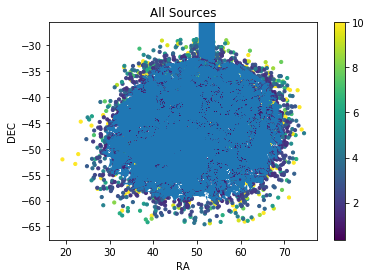

In [278]:
thaBeam(data1,0.2,1)

337
RA range: (36.0025749207,64.6180801392)
Dec range (-55.7985115051,-36.049659729)


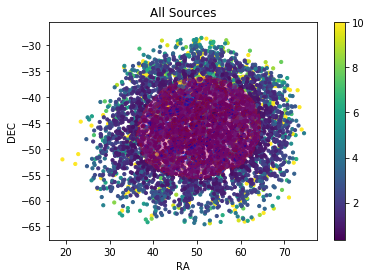

In [269]:
thaBeam(data1,0.45,0.5)

5181
RA range: (19.2112636566,74.53150177)
Dec range (-64.5979995728,-28.5440196991)


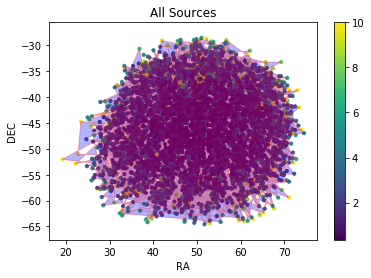

In [270]:
thaBeam(data1,0,1)

In [ ]:
thaBeam(data1,0)